# Perceptron in R

### By Thomas Oswald
### Spring 2020

In [1]:
# Read Iris CSV
data_csv <- read.csv("iris_data.csv")

# limit the dataset so that it only contains measurements from Setosa and Versicolor
data_csv <- data_csv[1:100,]
head(data_csv)

SepalLength,SepalWidth,PetalLength,PetalWidth,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
# Create a subset dataset with only Sepal Width and Petal Length
data <- data_csv[, c(2,3,5)]
head(data)

SepalWidth,PetalLength,Species
3.5,1.4,setosa
3.0,1.4,setosa
3.2,1.3,setosa
3.1,1.5,setosa
3.6,1.4,setosa
3.9,1.7,setosa


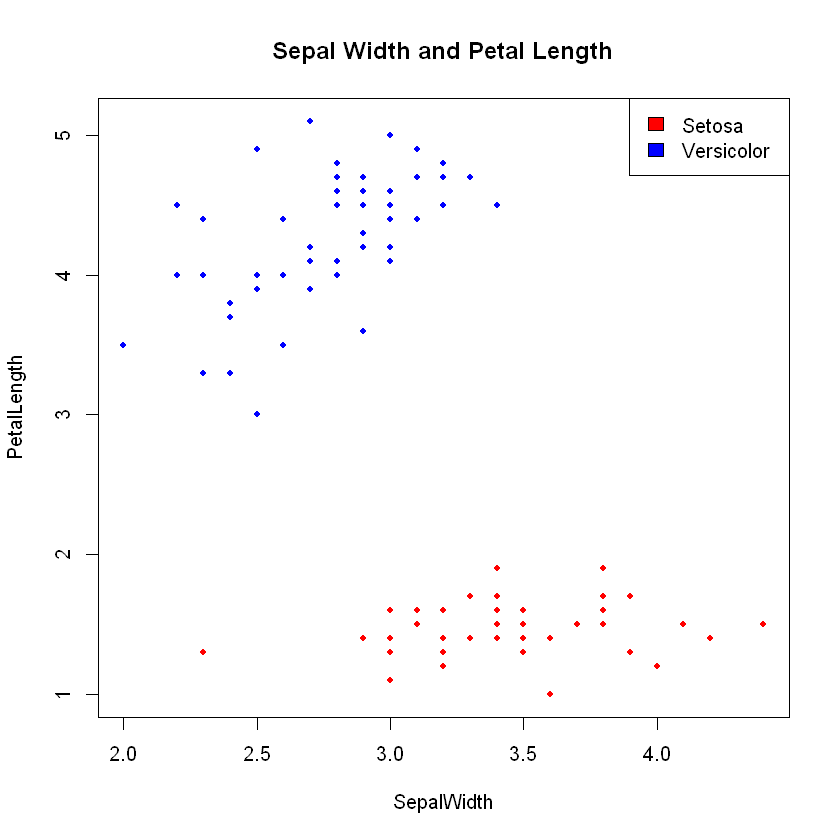

In [3]:
# first we plot the data
plot(PetalLength ~ SepalWidth,
     data = data,
     main = "Sepal Width and Petal Length",
     type = 'n')

# This will assign a specific color for Setosa species
points(PetalLength ~ SepalWidth,
      data = data,
      subset = Species == "setosa",
      col = "red",
      pch = 20)

# This will assign a specific color for versicolor species
points(PetalLength ~ SepalWidth,
      data = data,
      subset = Species == "versicolor",
      col = "blue",
      pch = 20)


legend("topright", c("Setosa","Versicolor"), fill = c("red","blue"))

Now we subset the data

In [4]:
X1 <- data[,1]                         # first column of measurements
X2 <- data[,2]                         # second column of measurements
Y <- c()
for (i in 1:100){
    if (data[,3][i] == "setosa")       # Setosa == 1. Versicolor == -1
        Y[i] <- 1
    else
        Y[i] <- -1
}

Now we define our functions

In [5]:
# intialize your weights randomly
set.seed(2)
w <- rnorm(3)                              # w is a 1x3 vector
w

[1] -0.8969145  0.1848492  1.5878453

In [6]:
# define hypothesis function
h <- function(x1, x2, weights) { 
    x_new <- rbind(1.0, x1, x2)            # x_new is a 3x1 vector
    
    if (weights %*% x_new > 0)            # 1x3 * 3x1 = 1x1. The %*% is for matrix multiplication
        1
    else
        -1
    }

In [7]:
# Perceptron Learning Algorithm 
PLA <- function(x1, x2, y, weights){
    if (h(x1, x2, weights) != y)              # if the hypothesis function for a given species doesnt match correctly
        return(weights + (y * c(1.0, x1, x2)))  
    
    else (h(x1, x2, weights) == y)
        return(weights + (-y * c(1.0, x1, x2)))
}

In [8]:
# Iterate the PLA 1000 times for testing

for (i in 1:10500)
{
    j <- sample(1:100,1)
    w <- PLA(X1[j], X2[j], Y[j], w)
}
w

[1] -0.8969145 -1.1151508 -1.3121547

In [9]:
# new weights as a line
x <- 1:5
w_vect <- w[2]*x/w[3]+ w[1]/w[3]

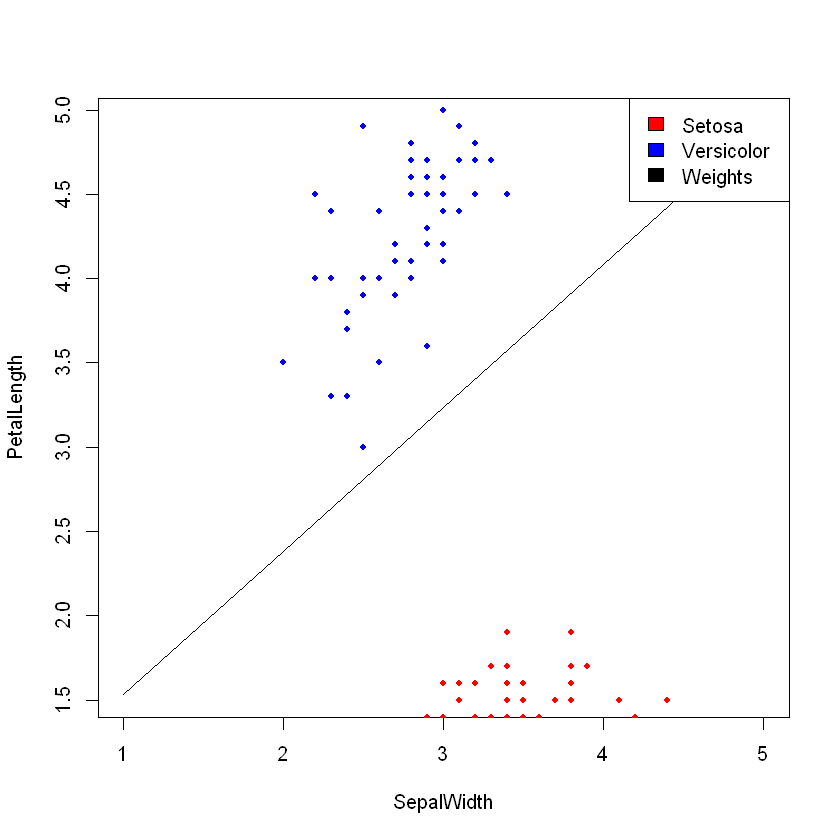

In [10]:
#plot the new weights

plot(w_vect,
     type = "l",
     xlab = "SepalWidth",
     ylab = "PetalLength")

# This will assign a specific color for Setosa species
points(PetalLength ~ SepalWidth,
      data = data,
      subset = Species == "setosa",
      col = "red",
      pch = 20)

# This will assign a specific color for versicolor species
points(PetalLength ~ SepalWidth,
      data = data,
      subset = Species == "versicolor",
      col = "blue",
      pch = 20)


legend("topright", c("Setosa","Versicolor","Weights"), fill = c("red","blue","black"))

In [11]:
# Predict the species
predict <- function(w, k){                       # k_th row in the 1:100 dataset of setosa and versicolor
    if (h(X1[k],X2[k],w) == 1)
        "Setosa"
    else
        "Versicolor"
}

In [12]:
predict(w,51)

[1] "Versicolor"